# LAB-5
# DATE- 20-04-2023

## ATTEMPTED

###  1. write a python program to convert files from one format to another 
#### a.Merge infinite CSV files into single JSON
#### b.convert Nested JSON into CSV

In [2]:
import os

In [3]:
import csv

In [4]:
import json

In [5]:
files=os.listdir('.')
print(files)

['.DS_Store', 'Untitled.ipynb', 'LAB 5.ipynb', 'merged_data.json', 'FINALmerged_data.json', '.ipynb_checkpoints', 'DEM lab 5-2 .csv', 'nested_file.json', 'DEm lab 5-1.csv']


### 1a

In [6]:
files = [filename for filename in os.listdir('.')
         if filename.endswith('.csv')]
data = []
for filename in files:
    with open(filename, mode='r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(row)
with open('FINALmerged_data.json', mode='w') as json_file:
    json.dump(data, json_file)

### 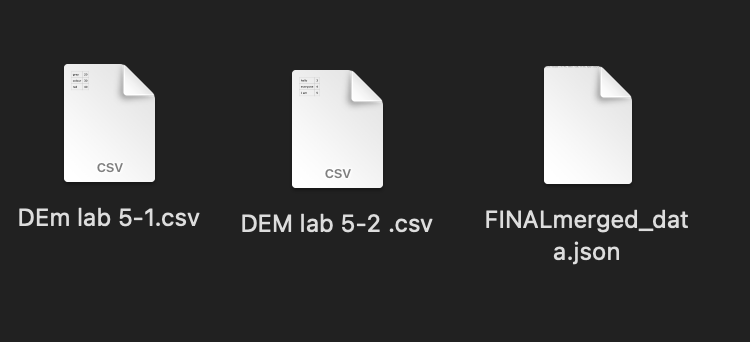

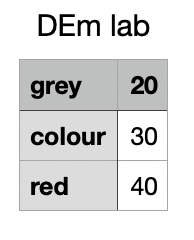

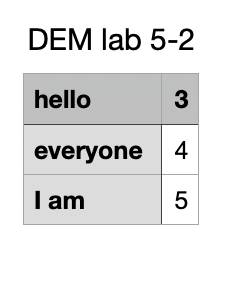

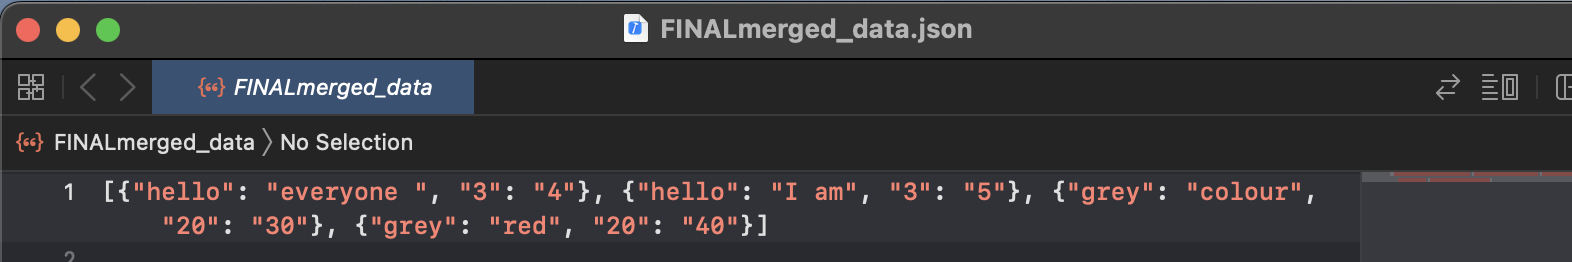

### 1b

In [7]:
def json_to_csv(input_file, output_file):
    with open(input_file) as json_file:
        data = [json.loads(line) for line in json_file]
    headers = set()
    for record in data:
        headers.update(record.keys())
    with open(output_file, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=sorted(headers))
        writer.writeheader()
        for record in data:
            writer.writerow(record)
if __name__ == '__main__':
    input_file = 'nested_file.json'
    output_file = 'nested_file.csv'
    json_to_csv(input_file, output_file)


JSONDecodeError: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)

### 2.Read a JSON file and insert its records into Mongo DB.

In [8]:
import json
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017')
db = client['kusuma']
collection = db['kus']
with open('FINALmerged_data.json') as o:
    data = json.load(o)
for record in data:
    collection.insert_one(record)

####  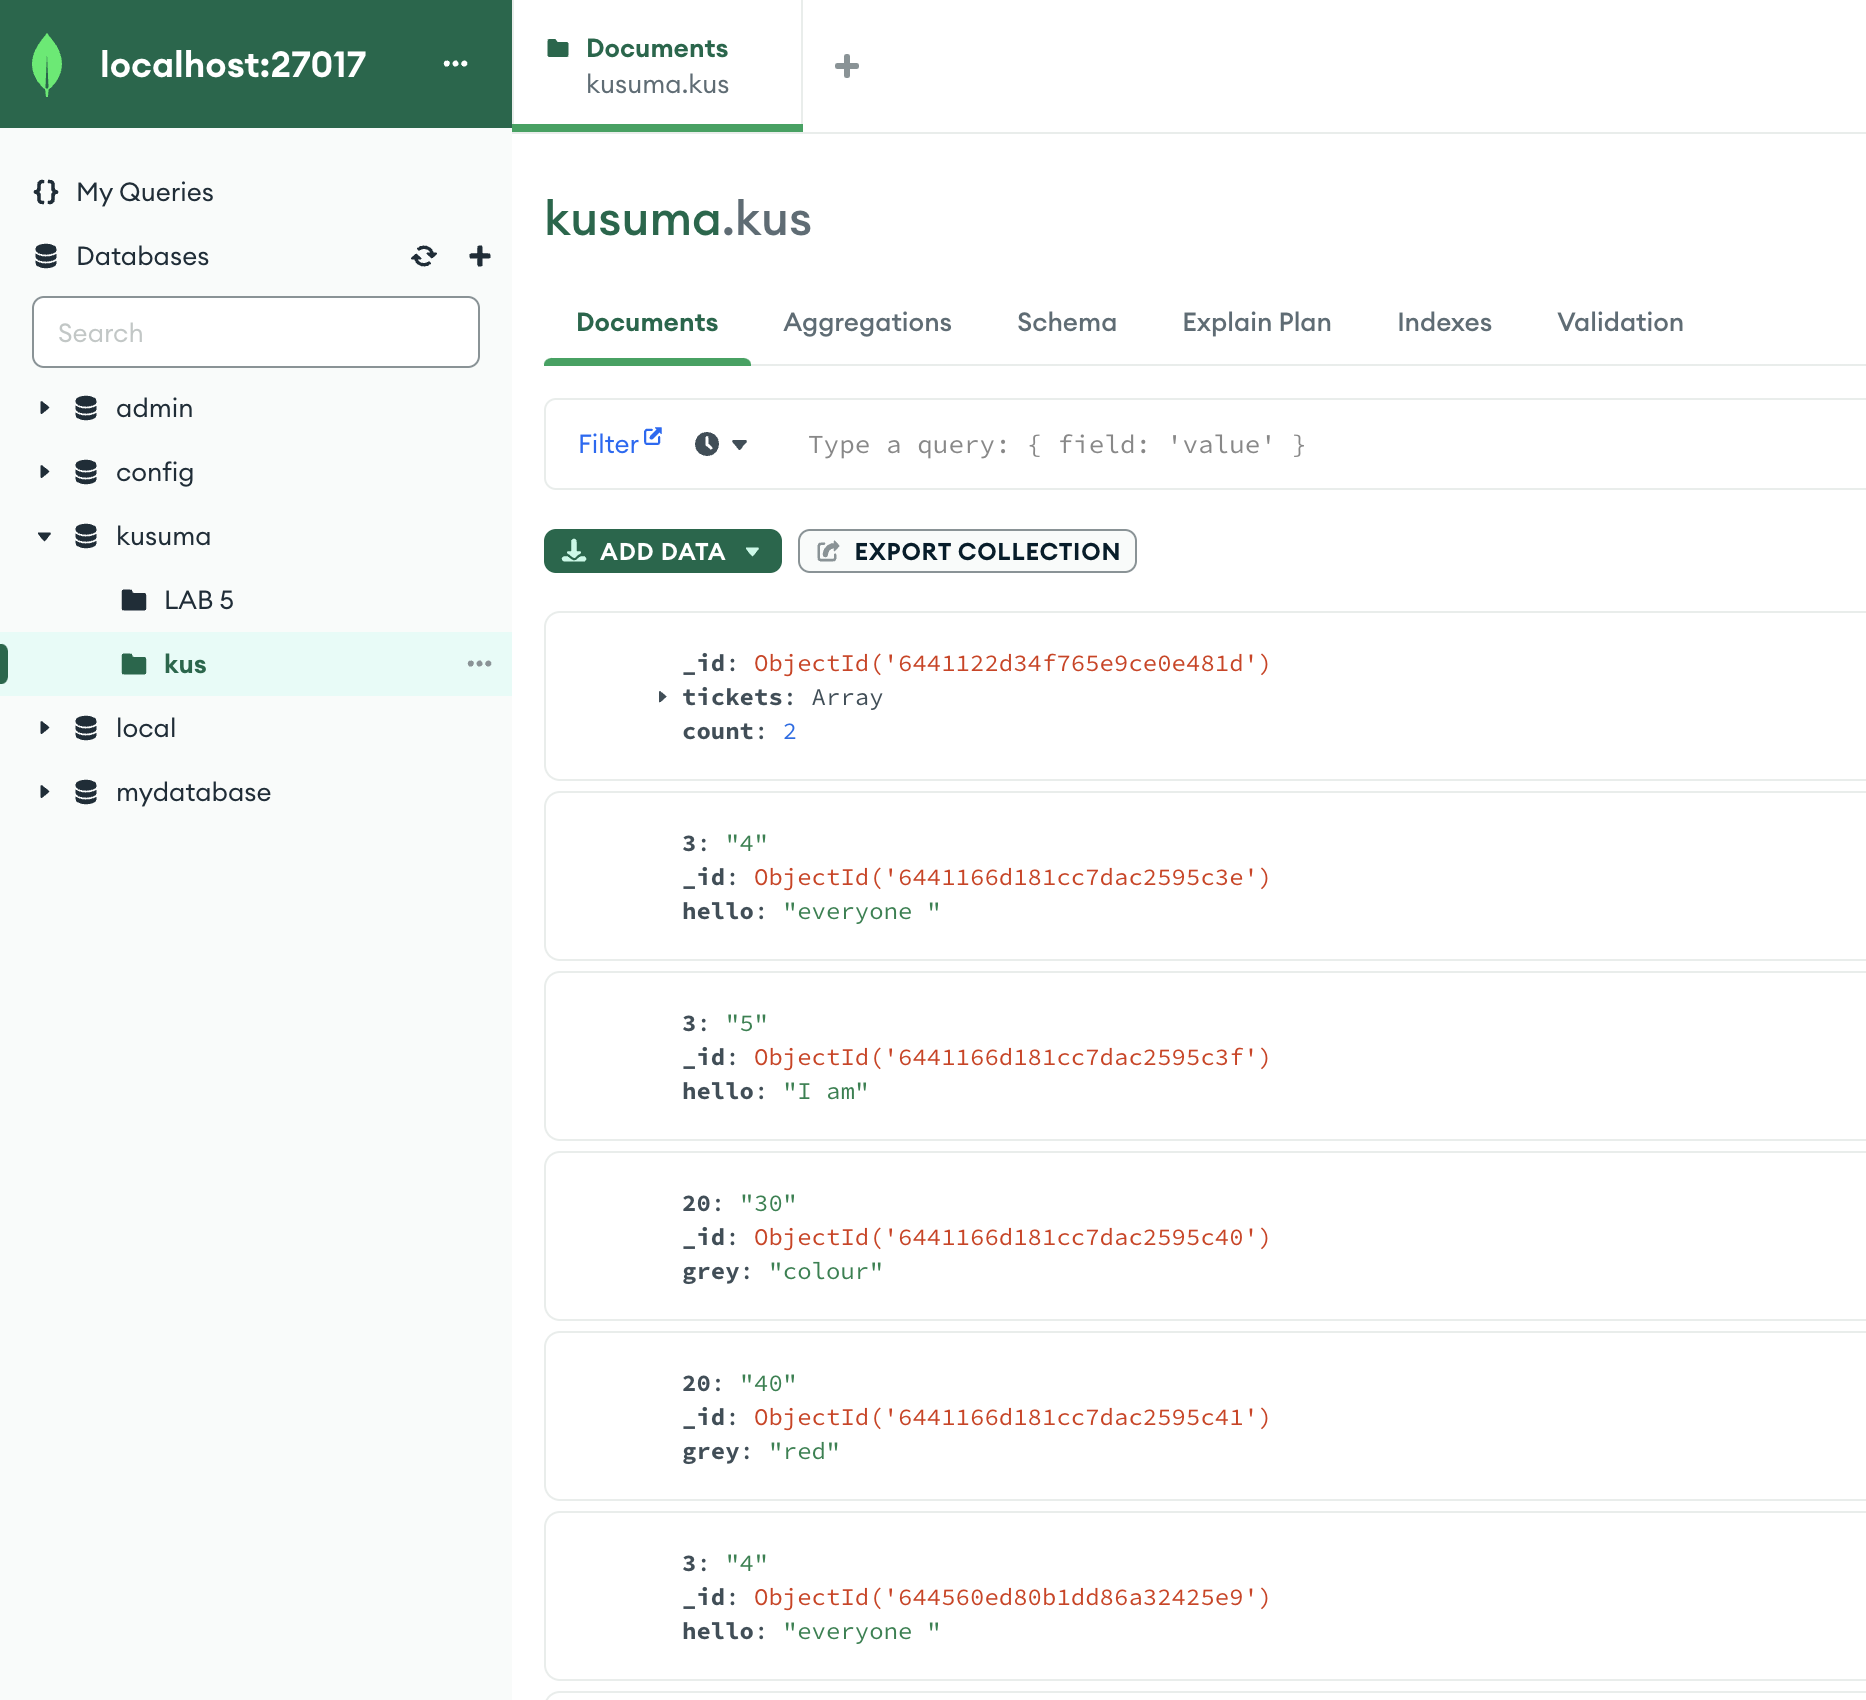